In [2]:
# useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [4]:
# read in data
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(967332, 14)


,auctionId,timeStamp,placementId,websiteId,hashedRefererDeepThree,country,opeartingSystem,browser,browserVersion,device,environmentType,integrationType,articleSafenessCategorization,isSold
0,001ed16b-dd08-4599-b8ef-4f56a373c454_6e5f1087-...,1603815466,120706,68203,1ae7c2d3c28b711c072d8e2eb3869fa59090669bdc153e...,US,Windows,Chrome,86_0,PC,js-web,2,safe,False
1,0024b36a-4fb5-4070-88fb-fc0bfb1909ed,1603974586,69454,42543,df1108bf6ae49dbccf5eab60ff9d04a6a09dda60ec7290...,RO,Android,Facebook App,293_0,Phone,js-fbwv,1,unsafe,False
2,003630fa-ad63-4283-be1b-141670132d70_f37c2b23-...,1604229969,100170,57703,cc6957e8aec85a4d920991c53874c5d0780bbfbd469802...,UK,Android,Facebook App,294_0,Phone,js-web,2,safe,True
3,0048c65a-ce76-43ba-98d2-8e87607468f8,1604156610,100446,57797,7fc0bb7a65d074e003cce786cda2b070f80dd47179c4b9...,ES,Android,Chrome Mobile,86_0,Phone,js-ampsf,1,safe,True
4,0056b8a7-54f9-4ac8-8d50-f725bf377872,1604004493,119517,67613,3a6552ccbf66ad166aa9005c3e08f70716abd676cfd87b...,FR,Android,Facebook App,293_0,Phone,js-fbwv,1,unsafe,False


In [5]:
print(df.isSold.value_counts())

isSold
False    533425
True     433907
Name: count, dtype: int64


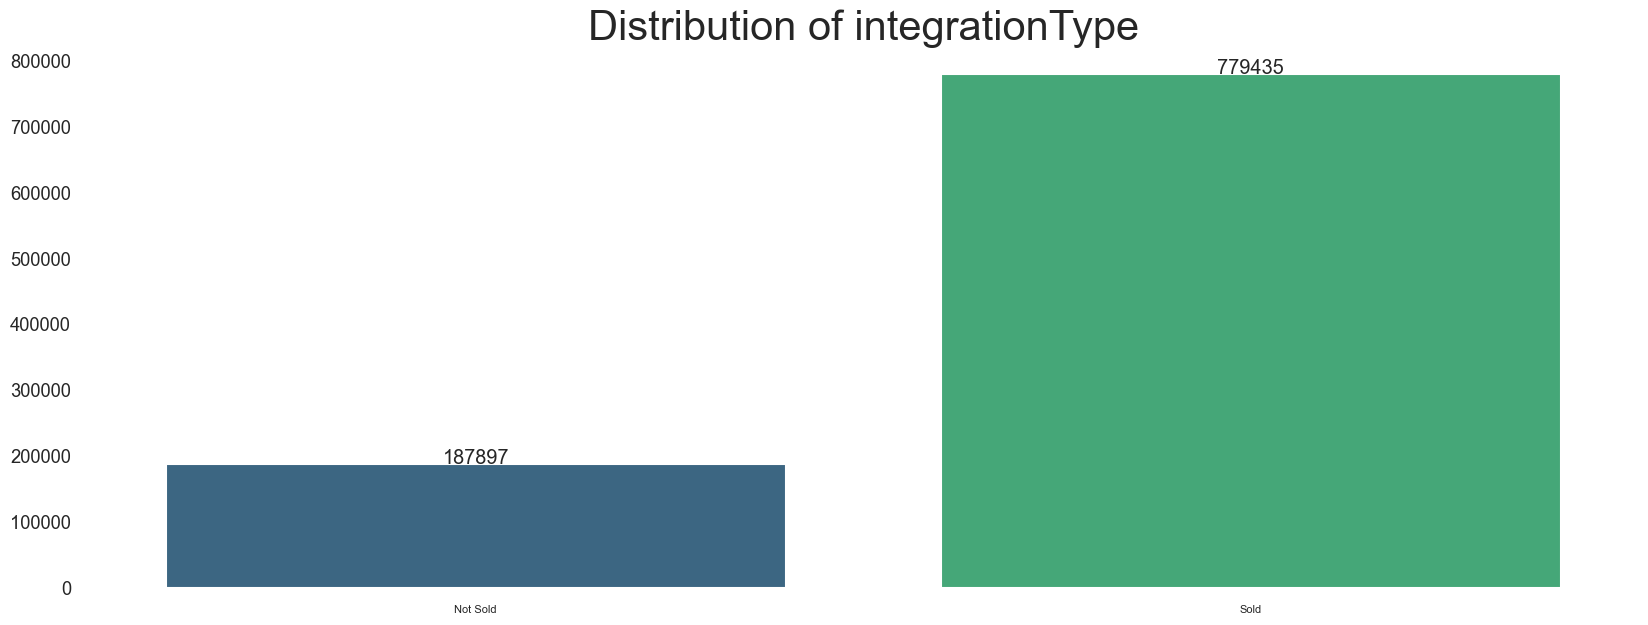

In [6]:
fig, ax = plt.subplots()
g = sns.countplot(data=df, x='integrationType', palette='viridis')
g.set_xticklabels(['Not Sold', 'Sold'])

def show_values_on_bars(ax):
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = '{:.0f}'.format(p.get_height())
        ax.text(_x, _y, value, ha="center")

show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of integrationType', fontsize=30)
plt.xticks(fontsize=8)  # Adjust the font size of x-axis tick labels

plt.show()

In [7]:

# Prétraitement des données
X = df.drop('isSold', axis=1)
y = df['isSold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
numeric_features = ['timeStamp']
categorical_features = ['auctionId', 'placementId', 'websiteId', 'hashedRefererDeepThree', 'country', 'opeartingSystem', 'browser', 'browserVersion', 'device', 'environmentType', 'integrationType', 'articleSafenessCategorization']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [9]:
# Définir la grille des hyperparamètres
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

In [10]:
# Créer l'objet GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

#Trouver le meilleur model
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_
best_model = grid_search.best_estimator_

In [ ]:
# Évaluation du modèle final
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best F1-score:", best_f1)